```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. 
```

# Underfitting vs Overfitting

## Table of Contents

- [Introduction](#intro)
- [Example - Underfitting and overfitting with linear regression and polynomial features to approximate nonlinear functions](#ex1)

---
<a id='into'></a>

## Introduction

XXXXXX

---
<a id='ex1'></a>

## Example - Underfitting and overfitting with linear regression and polynomial features to approximate nonlinear functions
From: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. 
- We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called `underfitting`. 
- A polynomial of degree 4 approximates the true function almost perfectly. 
- However, for higher degrees the model will `overfit` the training data, i.e. it learns the noise of the training data. 

We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the `mean squared error (MSE)` on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [3]:
np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

In [4]:
X = np.sort(np.random.rand(n_samples))
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [5]:
y = true_fun(X) + np.random.randn(n_samples) * 0.1
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

In [7]:
# Example for degree = 2
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

# https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
# Extend array dimension of X
pipeline.fit(X[:, np.newaxis], y)
scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

PolynomialFeatures(include_bias=False)

In [8]:
X[:, np.newaxis], y

(array([[0.0202184 ],
        [0.07103606],
        [0.0871293 ],
        [0.11827443],
        [0.14335329],
        [0.38344152],
        [0.41466194],
        [0.4236548 ],
        [0.43758721],
        [0.46147936],
        [0.52184832],
        [0.52889492],
        [0.54488318],
        [0.5488135 ],
        [0.56804456],
        [0.60276338],
        [0.63992102],
        [0.64589411],
        [0.71518937],
        [0.77815675],
        [0.78052918],
        [0.79172504],
        [0.79915856],
        [0.83261985],
        [0.87001215],
        [0.891773  ],
        [0.92559664],
        [0.94466892],
        [0.96366276],
        [0.97861834]]),
 array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
        -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
        -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
        -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
        -1.03009698, -0.63623922, -0.86230652,

In [10]:
X_test = np.linspace(0, 1, 100)
X_test

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [11]:
y_pred = pipeline.predict(X_test[:, np.newaxis])
y_pred

array([31.44929241, 10.18574925,  1.09028381, -1.71405098, -1.69256071,
       -0.74061621,  0.22444513,  0.85828197,  1.12183936,  1.11244302,
        0.96414611,  0.7950202 ,  0.68486897,  0.67141204,  0.75654375,
        0.91699807,  1.11579844,  1.31237381,  1.47028959,  1.56226989,
        1.57265335,  1.49769447,  1.34424826,  1.12740189,  0.86757587,
        0.58753671,  0.30966243,  0.05369628, -0.16487563, -0.33577589,
       -0.45424086, -0.52075812, -0.54035116, -0.52154573, -0.47515728,
       -0.4130315 , -0.34685417, -0.28712319, -0.2423498 , -0.21852809,
       -0.21888545, -0.24390227, -0.29156962, -0.35783754, -0.4371972 ,
       -0.52333493, -0.60979656, -0.69060527, -0.76078477, -0.81675095,
       -0.85654843, -0.87992255, -0.88823117, -0.88421333, -0.87164258,
       -0.85490101, -0.83851492, -0.82669473, -0.82292065, -0.82960939,
       -0.84789203, -0.87751939, -0.91690507, -0.96329837, -1.01307229,
       -1.06209919, -1.10617693, -1.14146422, -1.16488244, -1.17

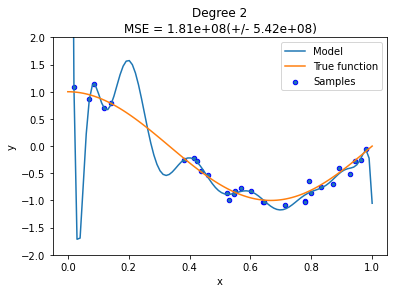

In [14]:
plt.plot(X_test, y_pred, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(2, -scores.mean(), scores.std()))
plt.show()

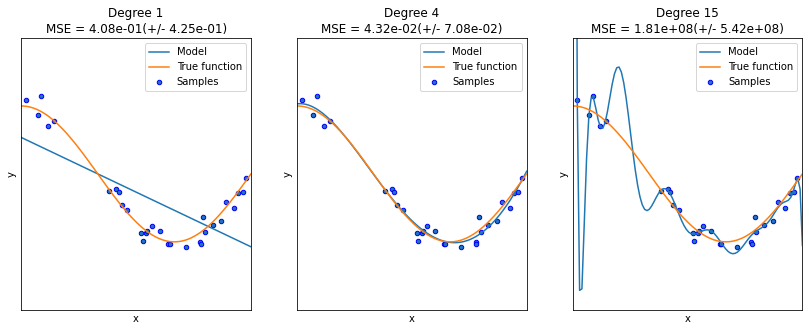

In [15]:
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()